## Hypothesis testing

- During the night the accidents tend to be more severe.
- During the weekend (Friday - Sunday) the number of accidents increases.
- Most dangerous hours to drive
- Worse road condition/type or weather
- Hazards 1 if there are 0 if there are not

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('../data/clean_data.csv', index_col=0)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
df.head()

,lon,lat,severity,num_vehicles,num_casualties,date,doy,time,road_type,Speed_limit,ped_crossing,light_cond,weather,road_cond,hazards,urb_or_rur,police_presence,year
0,-0.169101,51.493429,3,2,1,2012-01-19,5,21,Single carriageway,30,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012
1,-0.200838,51.517931,3,2,1,2012-04-01,4,17,Single carriageway,30,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012
2,-0.188636,51.487618,3,2,1,2012-10-01,3,10,One way street,30,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,1,Yes,2012
3,-0.200259,51.514325,3,1,1,2012-01-18,4,12,Single carriageway,30,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,1,Yes,2012
4,-0.183773,51.497614,3,1,1,2012-01-17,3,20,Single carriageway,30,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,1,Yes,2012


Creating a column that tells if an accident happened during the night (22-6) or during the day (7-21)

In [8]:
df['night'] = np.where((df['time'] >= 7) & (df['time'] <= 22), 0, 1)

Same thing for the weekend days (Fri-Sun).

In [9]:
df['weekend'] = np.where((df.doy == 6) | (df.doy == 7) | (df.doy == 1), 1, 0)

In [10]:
df['night_weekend'] = np.where((df.night == 1) & (df.weekend == 1), 1, 0)

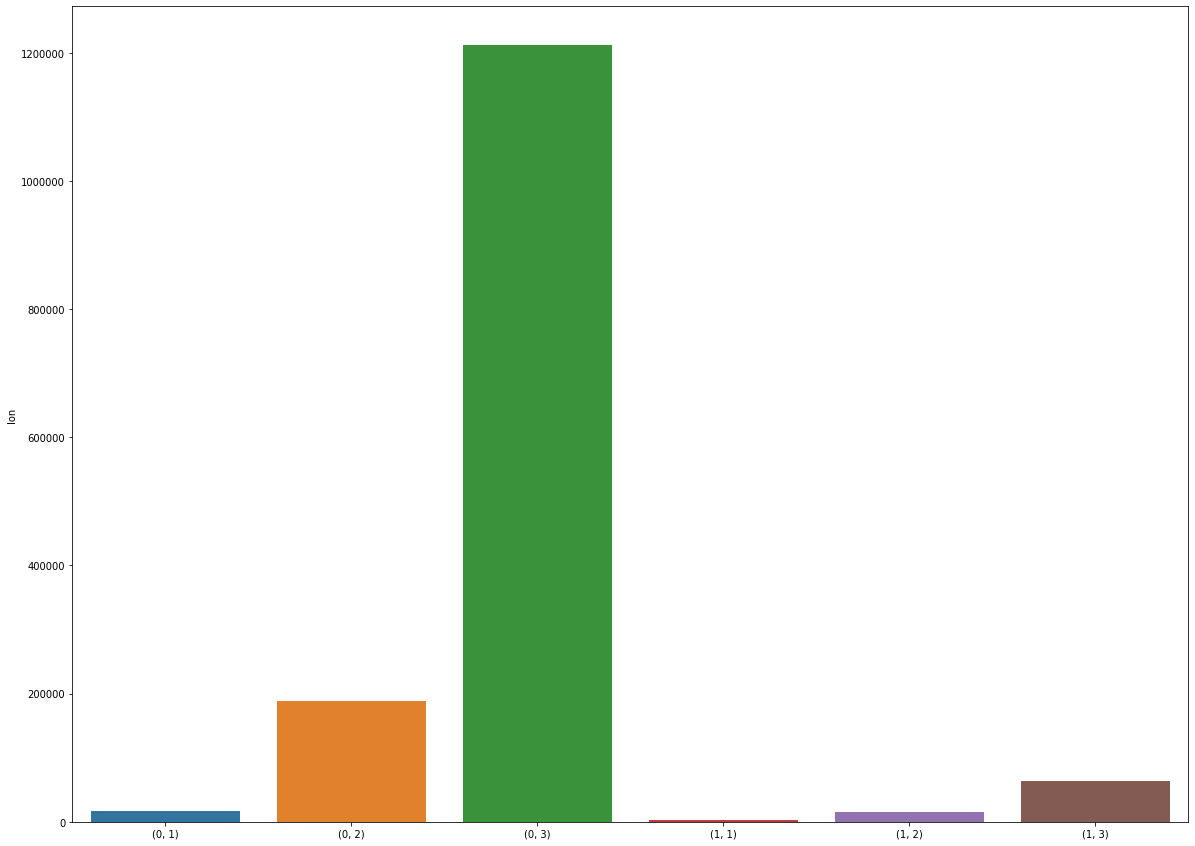

In [16]:
plt.figure(figsize=(20,15))
sns.barplot(df.groupby(['night_weekend', 'severity']).count().index, 
            df.groupby(['night_weekend', 'severity']).count()['lon'])

2-bar plot with percentages of fatal accidents over total accidents during night_weekend and not night_weekend

In [ ]:
sns.barplot(df.groupby(['night_weekend', 'severity']).count().index, 
            df.groupby(['night_weekend', 'severity']).count()['lon'])

In [31]:
perc_fatal_night_weekend = df[df.night_weekend == 1].groupby(['severity']).count()['lon'][1]/sum(df[df.night_weekend == 1].groupby(['severity']).count()['lon'])

In [32]:
perc_fatal_rest_of_week = df[df.night_weekend == 0].groupby(['severity']).count()['lon'][1]/sum(df[df.night_weekend == 0].groupby(['severity']).count()['lon'])

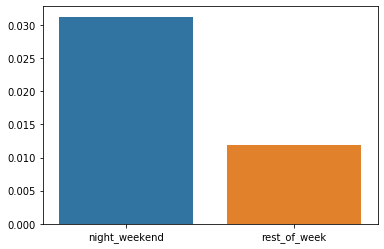

In [33]:
sns.barplot(['night_weekend', 'rest_of_week'], [perc_fata_night_weekend, perc_fatal_rest_of_week])

Applying chi-squared test to check for independency.

In [73]:
cont_table = pd.crosstab(df.night_weekend, df.severity)

In [74]:
cont_table

severity,1,2,3
night_weekend,,,
0,16838,188293,1211778
1,2577,15825,64162


In [75]:
chi2_test = stats.chi2_contingency(cont_table)

In [77]:
chi2_test[1], chi2_test[3][1]

(0.0, array([ 1069.02895884, 11239.1477219 , 70255.82331926]))

The p-value for the chi-squared test is 0 and therefore we can reject the null hypothesis that the different categories in our contigency table are indepedent. This means that the severity of an accident is in fact influenced by the fact that it happens on weekend nights.